In [2]:
import pandas as pd
import spacy
from spacy import displacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = 15,8
sns.set(rc={'figure.figsize':(15,8)})

In [4]:
df = pd.read_csv("data/lyrics/genius_v5.csv")

In [5]:
genius=df.iloc[:,2:]

In [6]:
nlp = spacy.load("en_core_web_lg")


In [7]:
neighborhoods=pd.read_csv("data/neighborhoods/cleaned_neighborhoods.csv").iloc[:,1:].Neighborhoods.values.sum().split(", ")

In [8]:
import regex as re

In [8]:
start_template="\[\"(.*) Lyrics\["
m=re.search(start_template,'"["Unforgettable Lyrics[Chorus: Swae Lee]')
m.group(1)

'Unforgettable'

In [9]:
for ent in nlp("Feelin' like I'm fresh out of Bronx").ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


Feelin 0 6 ORG
Bronx 30 35 GPE


In [10]:
LoI=[]
for artist,songs in zip(genius.Name, genius.lyrics):
    lines=str(songs).split("\\n")
    for i,line in enumerate(str(songs).split("\\n")):
        m=re.search(start_template,line)
        line = str(line).replace("\'", "'")
        if m :
            song_name = m.group(1)
        else:
            doc = nlp(line)
            for ent in doc.ents:
                if ent.label_=="GPE" or ent.label_=="LOC" or ent.text in neighborhoods:
                    LoI.append([artist, song_name, ent.text,str(line), str(lines[i-1]) if i!=0 else "", str(lines[i+1]) if i<(len(lines)-1) else ""])


In [11]:
df=pd.DataFrame(LoI, columns=["Artist", "Song Name", "GPE", "Line", "Line Before", "Line After"])
df.to_csv("data/lyrics/genius_ner_v5.csv", index=False)

In [12]:
df=pd.read_csv("data/lyrics/genius_ner_v5.csv")

In [13]:
df

,Artist,Song Name,GPE,Line,Line Before,Line After
0,French Montana,100,Montana,[Verse 3: French Montana],NaN,"My niggas put in work, shawty held me down"
1,French Montana,100,hittin Key West,"They got keys from west, to hittin Key West",From the block to trynna get Madonna sales,"Thats a motherfucker, Delonte West"
2,French Montana,100,Frenchy,"So skinny, Frenchy",I'm baaack,"(woah, woah, woah) I told 'em. Go ahead"
3,French Montana,100,Montana,[Verse: French Montana],NaN,"Them niggas sold 17,000 (Hellooo)"
4,French Montana,100,Montana,"Now rock with the new nigga, Montana! (oh!)","Homie, from weed, coke, pills, liquor",[Outro: Pillsbury dope boy]
...,...,...,...,...,...,...
13087,Ol' Dirty Bastard,All in Together Now,rah,"Hip hop crowd makes me rah, rah, rah","You could never touch the stamina, while I\'m ...",Other MC\'s got flipped with the ease
13088,Ol' Dirty Bastard,All in Together Now,Niggas,"Niggas better loosеn they ass, felt the glass",So you betta\' run for cover,"A forty ouncе bottle, yo, yo, yo money, yo pass"
13089,Ol' Dirty Bastard,All in Together Now,Brownsville,"Down, to the Brownsville, oops you got smoked",I get you blurry in your eye with a high note,The shit I\'m dropping is stinking up your area
13090,Ol' Dirty Bastard,All in Together Now,New York,"No, lea-ving, the state, of New York (stay home)","No, smo-king, Phil-ly, blunts, or Backwoods (n...","It's, all good, long as I can, still feel some..."


In [14]:
df.GPE.value_counts()

Brooklyn      621
New York      569
↗             386
Montana       311
Harlem        251
             ... 
Pine Bluff      1
Brunswick       1
West Point      1
La Rioja        1
Fifth Ave       1
Name: GPE, Length: 2798, dtype: int64

In [15]:
df.shape

(13092, 6)

In [16]:
view =df[df.GPE=="East"]
view.shape

(81, 6)

In [17]:
view.iloc[:30].apply(lambda row : displacy.render(nlp(str(row["Line Before"])+"\n"+str(row["Line"])+"\n"+str(row["Line After"])),style="ent"),axis=1)

/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/spacy/displacy/__init__.py:200: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


169     None
183     None
198     None
1797    None
1869    None
2047    None
2067    None
2237    None
2357    None
2614    None
2982    None
3112    None
3409    None
3563    None
3687    None
3690    None
3693    None
5396    None
5404    None
5447    None
5584    None
5600    None
5775    None
5959    None
6126    None
6169    None
6428    None
6912    None
6914    None
6917    None
dtype: object

In [18]:
doc = nlp("""I\'m more than a threat, I\'m a problem To hell with Cotton, watch out when I come to Harlem So don\'t whisper or make a sound or quote""")

In [19]:
displacy.render(doc, style="ent")

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
sia = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()

In [21]:
lemmatizer.lemmatize("Crooklyn better known as Brooklyn")

'Crooklyn better known as Brooklyn'

In [22]:
sia.polarity_scores("Fuck, the weather is so good today")

{'neg': 0.286, 'neu': 0.408, 'pos': 0.306, 'compound': 0.0622}

In [23]:
sia.polarity_scores("""I\'m more than a threat, I\'m a problem To hell with Cotton, watch out when I come to Harlem So don\'t whisper or make a sound or quote""")

{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'compound': -0.8996}

In [24]:
df["polarity"]=df.apply(lambda row : sia.polarity_scores(str(row["Line Before"]) if row["Line Before"] else "" +"\n"+row["Line"]+"\n" + str(row["Line Before"]) if row["Line Before"] else ""),axis=1)

In [25]:
df

,Artist,Song Name,GPE,Line,Line Before,Line After,polarity
0,French Montana,100,Montana,[Verse 3: French Montana],NaN,"My niggas put in work, shawty held me down","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,French Montana,100,hittin Key West,"They got keys from west, to hittin Key West",From the block to trynna get Madonna sales,"Thats a motherfucker, Delonte West","{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp..."
2,French Montana,100,Frenchy,"So skinny, Frenchy",I'm baaack,"(woah, woah, woah) I told 'em. Go ahead","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,French Montana,100,Montana,[Verse: French Montana],NaN,"Them niggas sold 17,000 (Hellooo)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,French Montana,100,Montana,"Now rock with the new nigga, Montana! (oh!)","Homie, from weed, coke, pills, liquor",[Outro: Pillsbury dope boy],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...
13087,Ol' Dirty Bastard,All in Together Now,rah,"Hip hop crowd makes me rah, rah, rah","You could never touch the stamina, while I\'m ...",Other MC\'s got flipped with the ease,"{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp..."
13088,Ol' Dirty Bastard,All in Together Now,Niggas,"Niggas better loosеn they ass, felt the glass",So you betta\' run for cover,"A forty ouncе bottle, yo, yo, yo money, yo pass","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
13089,Ol' Dirty Bastard,All in Together Now,Brownsville,"Down, to the Brownsville, oops you got smoked",I get you blurry in your eye with a high note,The shit I\'m dropping is stinking up your area,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp..."
13090,Ol' Dirty Bastard,All in Together Now,New York,"No, lea-ving, the state, of New York (stay home)","No, smo-king, Phil-ly, blunts, or Backwoods (n...","It's, all good, long as I can, still feel some...","{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp..."


In [26]:
df["pos"]=df["polarity"].apply(lambda polarity : polarity.get("pos"))
df["neg"]=df["polarity"].apply(lambda polarity : polarity.get("neg"))
df["neu"]=df["polarity"].apply(lambda polarity : polarity.get("neu"))
df["compound"]=df["polarity"].apply(lambda polarity : polarity.get("compound"))

In [93]:
places=list(df["GPE"].value_counts()[(df["GPE"].value_counts()>12)].index)
print(len(places))
less_places = list(df["GPE"].value_counts()[(df["GPE"].value_counts()>80)].index)
print(len(less_places))


159
18


In [94]:
incorrect_places=['↗',"ma", "There\\", "Don\\'t", "Ya'll"]

In [95]:
places

['Brooklyn',
 'New York',
 '↗',
 'Montana',
 'Harlem',
 'America',
 'Earth',
 'Bronx',
 'Cali',
 'ma',
 'Queens',
 'Miami',
 'Jersey',
 'Hollywood',
 'South',
 'NY',
 'Bonita',
 'East',
 'New York City',
 'There\\',
 'Atlanta',
 'Philly',
 'Chino',
 'LA',
 'Chicago',
 'L.A.',
 'NYC',
 'Manhattan',
 'Africa',
 'France',
 'London',
 'East Coast',
 'Brownsville',
 'Staten Island',
 'El Segundo',
 'Vegas',
 'Paris',
 'NJ',
 'California',
 'Detroit',
 'PA',
 'Bucktown',
 'Texas',
 'La',
 'Berned',
 'West Coast',
 'Mars',
 'North',
 'Brick City',
 'Roc',
 'Jamaica',
 'Mississippi',
 'King Kong',
 'Queensbridge',
 'Iraq',
 'Houston',
 'Dipset',
 'earth',
 "Don\\'t",
 'Boston',
 'Shaolin',
 'Arizona',
 'Los Angeles',
 'Philadelphia',
 'Long Island',
 'New Orleans',
 'Italy',
 'the East Coast',
 'New Jersey',
 'NC',
 'Newark',
 'Vietnam',
 'fort',
 'DC',
 'Venus',
 'West',
 'Japan',
 'morena',
 'Medina',
 "Ya'll",
 'D.C.',
 'TX',
 'China',
 'Canada',
 'Florida',
 'Yoyoyo',
 'FL',
 'Spain',
 'VA

In [96]:
less_places.remove('↗')
less_places.remove( 'Montana')
less_places.remove('ma')
less_places.remove('Miami')
less_places.remove('Cali')
less_places.remove('Bonita')
less_places.remove('Hollywood')

In [97]:
df_filtered=df[df["GPE"].isin(places)]
df_sample=df[df["GPE"].isin(less_places)]

In [1]:
df_sample

NameError: name 'df_sample' is not defined

In [98]:
df_filtered["GPE"]=df_filtered["GPE"].astype("str").astype("category")
df_sample["GPE"]=df_sample["GPE"].astype("str").astype("category")

/tmp/ipykernel_4819/1130032738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["GPE"]=df_filtered["GPE"].astype("str").astype("category")
/tmp/ipykernel_4819/1130032738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["GPE"]=df_sample["GPE"].astype("str").astype("category")


In [99]:
df_sample[df_sample.GPE=="Bonita"]

,Artist,Song Name,GPE,Line,Line Before,Line After,polarity,pos,neg,neu,compound


In [100]:
df_filtered.to_csv("data/5010010012sasaawqwuzzdf.csv")

In [10]:
df_filtered=pd.read_csv("data/5010010012sasaawqwuzzdf.csv")

In [11]:
df_filtered

,Unnamed: 0,Artist,Song Name,GPE,Line,Line Before,Line After,polarity,pos,neg,neu,compound
0,0,French Montana,100,Montana,[Verse 3: French Montana],NaN,"My niggas put in work, shawty held me down","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,3,French Montana,100,Montana,[Verse: French Montana],NaN,"Them niggas sold 17,000 (Hellooo)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,4,French Montana,100,Montana,"Now rock with the new nigga, Montana! (oh!)","Homie, from weed, coke, pills, liquor",[Outro: Pillsbury dope boy],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3,8,French Montana,100,Harlem,Shout out to ma niggas in Harlem,"Motthaven, you know, Tremont",Can't call no blocks out there,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,9,French Montana,100,Montana,"If the pussy good, hit it two times4Embed', ""’...","If the pussy good, hit it two times",Money ain't everything nigga it's the only thing,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.293,0.000,0.707,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...
7703,13085,Ol' Dirty Bastard,All in Together Now,Brooklyn,"I\'m a Brooklyn soldier, yes, I\'m is","Just in case, it\'s goin\' down","If you lookin\' for a problem, here it is","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
7704,13086,Ol' Dirty Bastard,All in Together Now,Brownsville,"Down, to the Brownsville, oops you got smoked",I get you blurry in your eye with a high note,The shit I'm dropping is stinking up your area,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",0.000,0.149,0.851,-0.1027
7705,13088,Ol' Dirty Bastard,All in Together Now,Niggas,"Niggas better loosеn they ass, felt the glass",So you betta\' run for cover,"A forty ouncе bottle, yo, yo, yo money, yo pass","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
7706,13089,Ol' Dirty Bastard,All in Together Now,Brownsville,"Down, to the Brownsville, oops you got smoked",I get you blurry in your eye with a high note,The shit I\'m dropping is stinking up your area,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",0.000,0.149,0.851,-0.1027


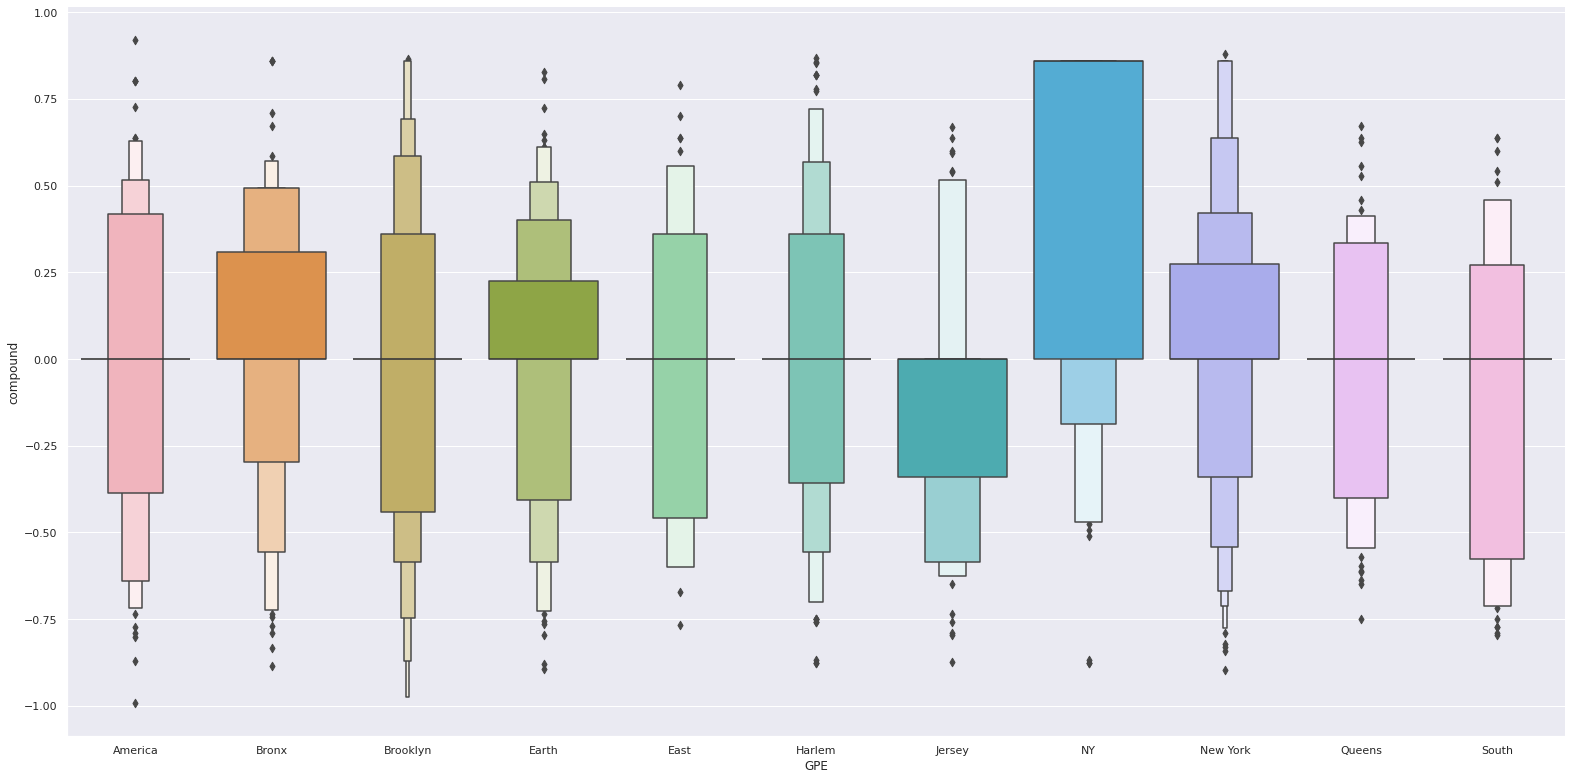

In [101]:
sns.catplot(data=df_sample, y="compound", x="GPE", kind="boxen", height=11, aspect=2)


TODO : plot la distribution entière y